<a href="https://colab.research.google.com/github/Nathan-oc/Estudos-DSNP/blob/main/An%C3%A1lise_Simples_Brasileir%C3%A3o_2003_2022_AUTORAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Essa será minha primeira análise feita totalmente sozinha, sem o "copia/cola" de outros notebooks, apenas se baseando no conhecimento que já possuo e tendo como inspiração análises de outras pessoas.

Diria que não será exatamente uma análise mas sim um treino de conceitos e ferramentas, portanto, não há um compromisso de ser uma análise completa mas que apenas perpassa pelos conhecimentos que vou obtendo.

Aqui vou trabalhar com base de dados do Campeonato Brasileiro de Futebol, o famoso *Brasileirão*, das temporadas de 2003 até 2022. 

Nessas bases possuem informações de todas as partidas disputadas, informações do times que se enfrentaram, informações das partidas etc.


As bases foram obtidas do Kaggle [nesse link](https://www.kaggle.com/datasets/adaoduque/campeonato-brasileiro-de-futebol).




---
# Desenvolvimento do código

Aqui começo o desenvolvimento de todo o código


## Importando bibliotecas

Vamos importar as bibliotecas que nos serão úteis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
full = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-full.csv')
gols = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-gols.csv')
cartoes = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-cartoes.csv')
estat = pd.read_csv('https://raw.githubusercontent.com/adaoduque/Brasileirao_Dataset/master/campeonato-brasileiro-estatisticas-full.csv')

In [ ]:
print(full.shape)
full.head()

(8025, 16)


,ID,rodata,data,hora,mandante,visitante,formacao_mandante,formacao_visitante,tecnico_mandante,tecnico_visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,NaN,NaN,NaN,NaN,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,NaN,NaN,NaN,NaN,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,NaN,NaN,NaN,NaN,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,NaN,NaN,NaN,NaN,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,NaN,NaN,NaN,NaN,-,Beira Rio,1,1,RS,SP


In [ ]:
print(gols.shape)
gols.head()

(7986, 6)


,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Fred,45,Penalty
1,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4611,1,Sao Paulo,Antônio Carlos dos Santos Aguiar,13,NaN


In [ ]:
print(cartoes.shape)
cartoes.head()

(16739, 8)


,partida_id,rodata,clube,cartao,atleta,num_camisa,posicao,minuto
0,4607,1,Figueirense,Amarelo,Paulo Roberto da Silva,28.0,NaN,66
1,4608,1,Internacional,Amarelo,Andrés D'Alessandro,10.0,Meio-campo,72
2,4608,1,Vitoria,Amarelo,Marcelo Machado dos Santos,29.0,NaN,86
3,4608,1,Vitoria,Amarelo,Mansur,NaN,Zagueiro,10
4,4607,1,Figueirense,Amarelo,Thiago Heleno,4.0,Zagueiro,44


In [ ]:
print(estat.shape)
estat.head()

(16050, 13)


,partida_id,rodata,clube,chutes,chutes_no_alvo,posse_de_bola,passes,precisao_passes,faltas,cartao_amarelo,cartao_vermelho,impedimentos,escanteios
0,1,1,Guarani,0,0,NaN,0,NaN,0,0,0,0,0
1,1,1,Vasco,0,0,NaN,0,NaN,0,0,0,0,0
2,2,1,Athletico-PR,0,0,NaN,0,NaN,0,0,0,0,0
3,2,1,Gremio,0,0,NaN,0,NaN,0,0,0,0,0
4,3,1,Flamengo,0,0,NaN,0,NaN,0,0,0,0,0


Vamos trabalhar com os dados do dataframe full:

In [ ]:
full.isnull().sum()

ID                       0
rodata                   0
data                     0
hora                     0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_Placar          0
visitante_Placar         0
mandante_Estado          0
visitante_Estado         0
dtype: int64

In [ ]:
full_clean = full.dropna(axis='columns')
full_clean

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,RS,SP


In [ ]:
n_gols = full_clean.mandante_Placar + full_clean.visitante_Placar
full_clean.insert(10, 'n_gols', n_gols)
full_clean

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,n_gols,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,6,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,2,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,2,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,4,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,2,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,3,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,3,RS,SP


In [ ]:
diff_gols = full_clean.mandante_Placar - full_clean.visitante_Placar
full_clean.insert(11, 'diff_gols', diff_gols)
full_clean

,ID,rodata,data,hora,mandante,visitante,vencedor,arena,mandante_Placar,visitante_Placar,n_gols,diff_gols,mandante_Estado,visitante_Estado
0,1,1,29/3/2003,16:00,Guarani,Vasco,Guarani,Brinco de Ouro,4,2,6,2,SP,RJ
1,2,1,29/3/2003,16:00,Athletico-PR,Gremio,Athletico-PR,Arena da Baixada,2,0,2,2,PR,RS
2,3,1,30/3/2003,16:00,Flamengo,Coritiba,-,Maracanã,1,1,2,0,RJ,PR
3,4,1,30/3/2003,16:00,Goias,Paysandu,-,Serra Dourada,2,2,4,0,GO,PA
4,5,1,30/3/2003,16:00,Internacional,Ponte Preta,-,Beira Rio,1,1,2,0,RS,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020,8021,38,13/11/2022,16:03,Cuiaba,Coritiba,Cuiaba,Arena Pantanal,2,1,3,1,MT,PR
8021,8022,38,13/11/2022,16:03,Bragantino,Fluminense,Fluminense,Nabizão,0,1,1,-1,SP,RJ
8022,8023,38,13/11/2022,16:03,Corinthians,Atletico-MG,Atletico-MG,Neo Química Arena,0,1,1,-1,SP,MG
8023,8024,38,13/11/2022,16:03,Internacional,Palmeiras,Internacional,Estádio José Pinheiro Borda,3,0,3,3,RS,SP


In [ ]:
full_clean[['mandante_Placar','visitante_Placar','n_gols','diff_gols']].describe()

,mandante_Placar,visitante_Placar,n_gols,diff_gols
count,8025.000000,8025.000000,8025.000000,8025.000000
mean,1.547040,1.024922,2.571963,0.522118
std,1.232277,1.024076,1.642025,1.561482
min,0.000000,0.000000,0.000000,-7.000000
25%,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,0.000000
75%,2.000000,2.000000,4.000000,1.000000
max,7.000000,7.000000,11.000000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89ea68ffd0>,
      dtype=object)

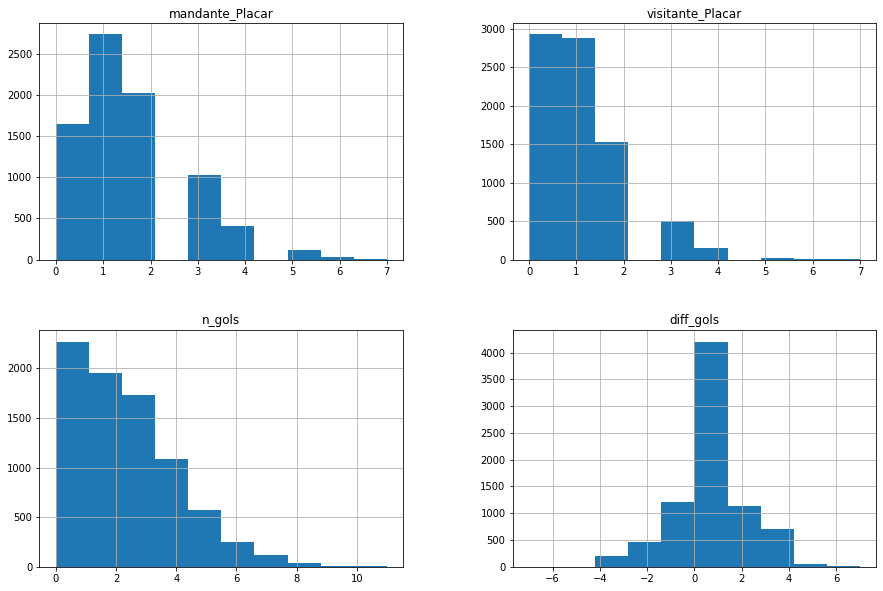

In [ ]:
full_clean[['mandante_Placar','visitante_Placar','n_gols','diff_gols']].hist(bins = 10, figsize = (15,10))

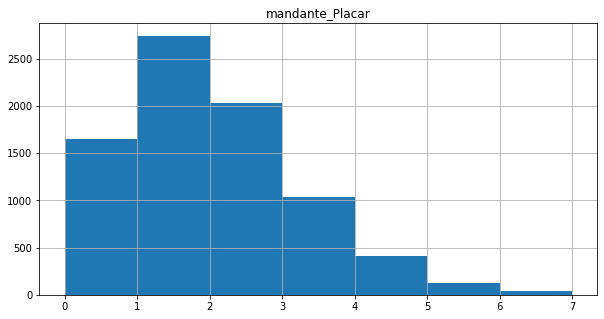

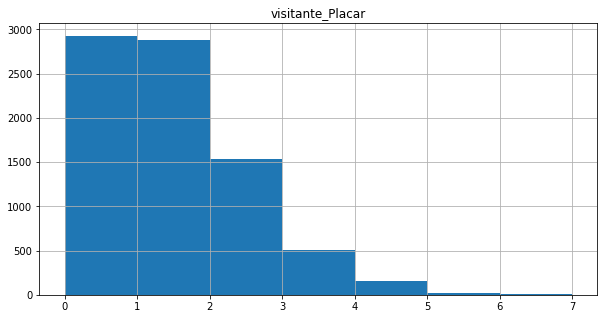

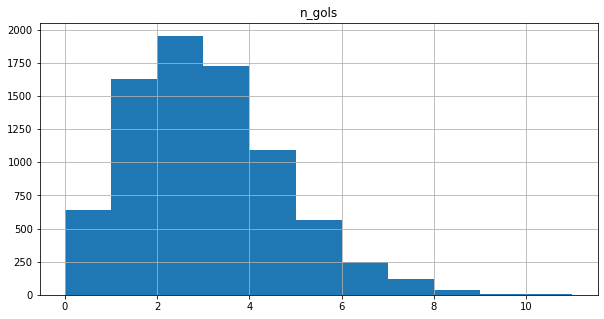

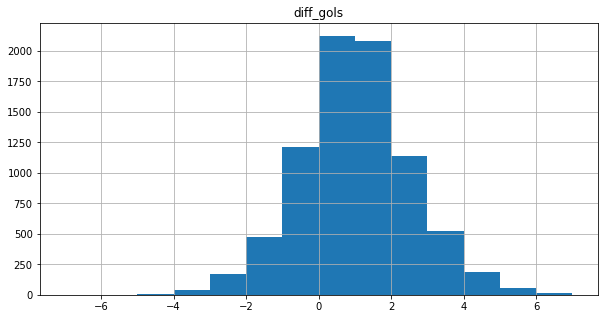

In [ ]:
feats = ['mandante_Placar','visitante_Placar','n_gols','diff_gols']
for i in feats:
  amplitude = full_clean[i].max() - full_clean[i].min()
  full_clean[[i]].hist(bins = amplitude, figsize = (10,5))

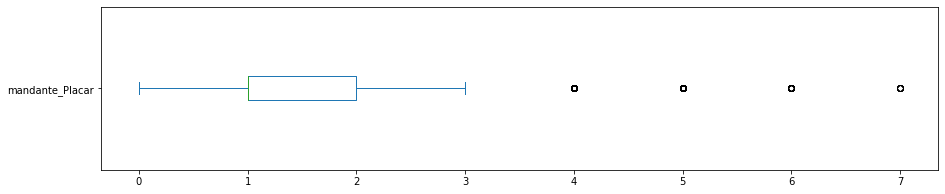

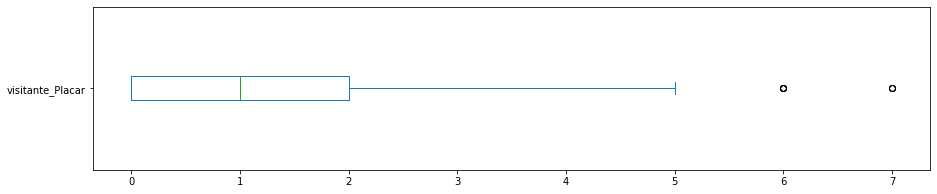

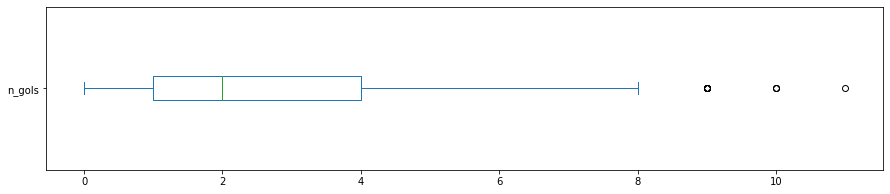

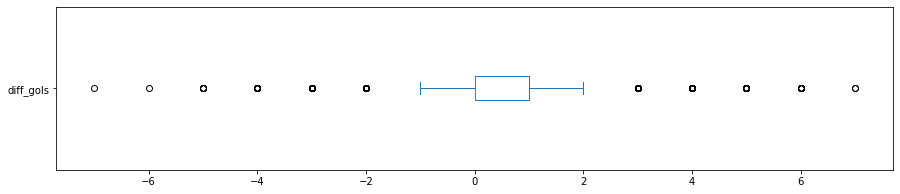

In [ ]:
for i in feats:
  full_clean[[i]].plot(kind = 'box', vert = False, figsize = (15,3))


In [ ]:
full_clean[['mandante_Placar','visitante_Placar','n_gols','diff_gols']].corr()

,mandante_Placar,visitante_Placar,n_gols,diff_gols
mandante_Placar,1.000000,0.051116,0.782341,0.755648
visitante_Placar,0.051116,1.000000,0.662027,-0.615496
n_gols,0.782341,0.662027,1.000000,0.183220
diff_gols,0.755648,-0.615496,0.183220,1.000000
